# Run statistical checks on `pygwb_pipe` output

This notebook is meant as a tutorial on how to use the `statistical checks` module within `pygwb`. More information about the `statistical checks` module can be found on the documentation page [here](https://a-renzini.github.io/pygwb/api/pygwb.statistical_checks.html).

We start by importing some packages needed for the execution of the tutorial:

In [1]:
import numpy as np
from pygwb.statistical_checks import StatisticalChecks
from pygwb.statistical_checks import run_statistical_checks_from_file
%matplotlib inline

*Note: make sure to run this notebook within an environment that has all the above packages installed.*

In this tutorial, an overview of the `statistical checks` module of `pygwb` is provided. More specifically, we will cover the initializiation of the class, as well as the various outputs of the class methods. This is illustrated on the results of the LVK O3 dataset, as obtained from a `pygwb` run (and saved in the `input` directory). This should illustrate the main features of the `statistical check` plots.

*Disclaimer: The output of `statistical checks` is dependent on changes in other modules (e.g. `delta sigma cut`). Therefore, the emphasis of the current status of notebook should be that this is a tool to give an idea of what the `statistical checks` do/how to use it, rather than on the actual numerical values (as these are subject to change due to modification in other parts of the code). Furthermore, the datasets shown below might not have been run with the most up-to-date pipeline.*

## Overview of the methods in `statistical checks`

Below we give an overview of the methods in the statistical checks module. We distinguish two categories: 
1) A set of methods that computes quantities that will be used later on in the module
2) A set of methods that plots the various quantities

### Methods defined in `statistical checks`

From the input passed to initialize the statistical checks class, various quantities are derived/computed. An overview of these method is given below with a short explanation.

**`get_data_after_dsc`**

Uses the attributes of the class set during the initialization of the class (sliding point estimate, sliding sigma, etc.) and applies a mask to cut out the values that correspond to bad GPS times as identified by the delta sigma cut. The output consists of arrays of all quantities with masks applied to original arrays.

**`compute_running_quantities`**

Uses as input the sliding point estimate and sliding sigma values that were set during the initialization of the class. Proceeds to compute the running point estimate and running sigma as a function of time. This will be used by one of the plotting methods to make plots of these running quantities as shown below (running point estimate as an example).

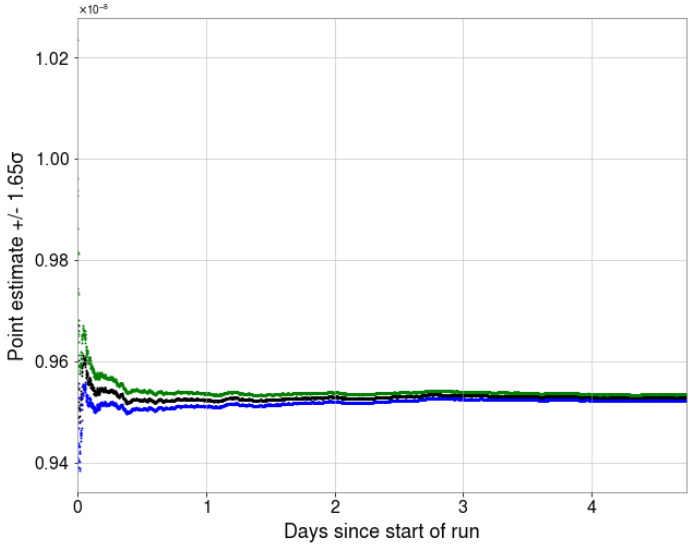

**`compute_ifft_integrand`**

Given the point estimate spectrum (which can be related to the so-called point estimate integrand), one can construct the inverse Fourier transform of this quantity, which is used in a plot (as shown below), where a peak at 0 would indicate a detection (more details will be given in the next section).

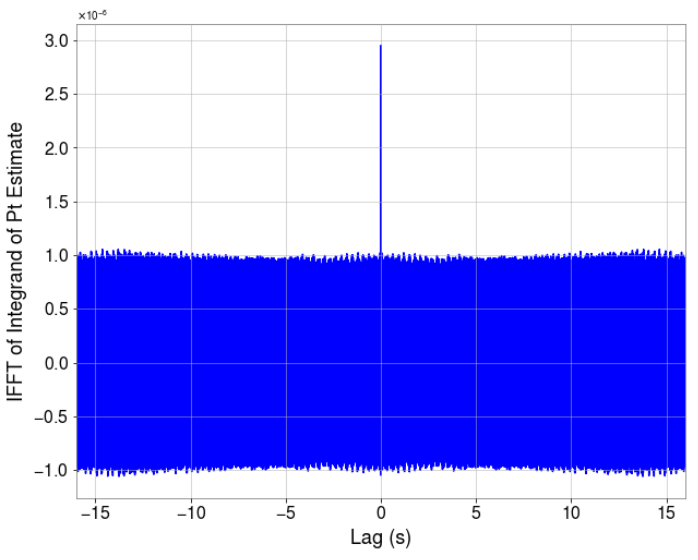

This concludes the part on methods that compute specific quantities. We now give an overview of the methods used for plotting.

### Methods for plotting in `statistical checks`

Below we give an overview of all the plotting methods. All these plotting methods and their functionalities will be illustrated later on in a few concrete test cases below.
- plot_running_point_estimate 

- plot_running_sigma

- plot_IFFT_point_estimate_integrand

- plot_SNR_spectrum

- plot_cumulative_SNR_spectrum

- plot_real_SNR_spectrum

- plot_imag_SNR_spectrum

- plot_sigma_spectrum

- plot_cumulative_sigma_spectrum

- plot_omega_sigma_in_time

- plot_hist_sigma_dsc

- plot_scatter_sigma_dsc

- plot_scatter_omega_sigma_dsc

- plot_hist_omega_pre_post_dsc

- plot_KS_test

- plot_hist_sigma_squared

- plot_omega_time_fit

The user could decide to call them one by one or to call all of them by using the `generate_all_plots()` method, as will be illustrated below.

We now proceed to illustrate the functionalities of the statistical checks class by considering two examples. Both examples were run on the output of the pygwb_pipeline. As mentioned previously, we are still working on a code/pipeline for the statistical checks to read in results from pygwb_pipe and optimization thereof. The two examples below rely on the current version of this statistical checks pipeline (not included in this tutorial for now). The key point is that that code reads in from files and combines all quantities into arrays that can then be passed to the statistical checks to initialize the class.

## Example: O3 data

As a concrete example, we consider a stretch of O3 data, on which `pygwb_pipe` was run. As mentioned above, we rely on the current version of a `statistical checks` pipeline that reads in from files (called `run_statistical_checks_from_file`). Note that this method initializes a `statistical checks` object behind the screens. Only part of the files of the O3 run are read in for the sake of time in this tutorial. The method used for reading in the files requires the following input:

- A directory where the output of the pygwb_pipe is saved

- A path to the combined spectra are saved

- The path to the parameter file used for the analysis

- A directory where the plots of statistical checks will be saved

These are defined below:

In [2]:
param_file = "./input/parameters.ini"
combine_file = "./input/point_estimate_sigma_spectra_alpha_0.0_fref_25_1267911343-1269307030.npz"
dsc_file = "./input/delta_sigma_cut_1267911343-1269307030.npz"
plot_dir = './'

Given the above paths, the `run_statistical_checks_from_file` method will read all necessary quantities from the files in those directories and initialize an instance of the `StatisticalChecks` class:

In [3]:
stat_checks_pygwb_O3=run_statistical_checks_from_file(combine_file, dsc_file, plot_dir, param_file)

As mentioned above, one can decide to run the plotting methods separately or call the `generate_all_plots` method. We choose the latter for this example:

/home/kevin.turbang/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


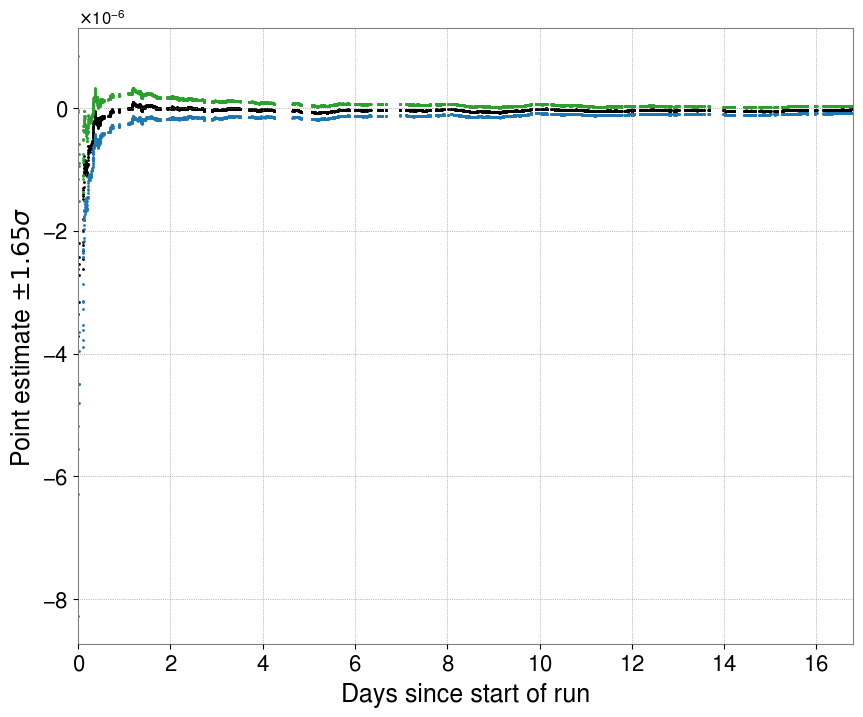

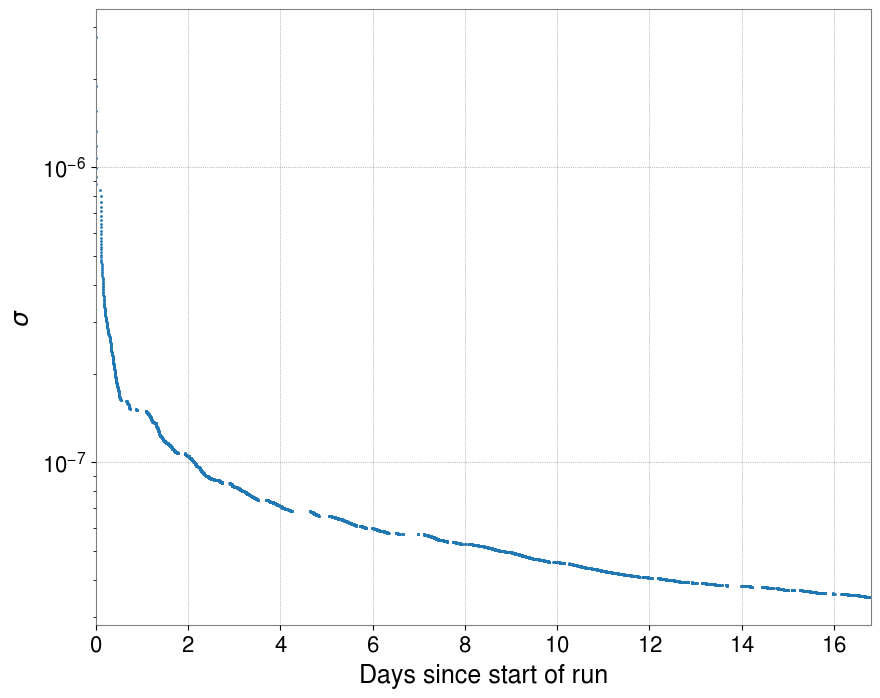

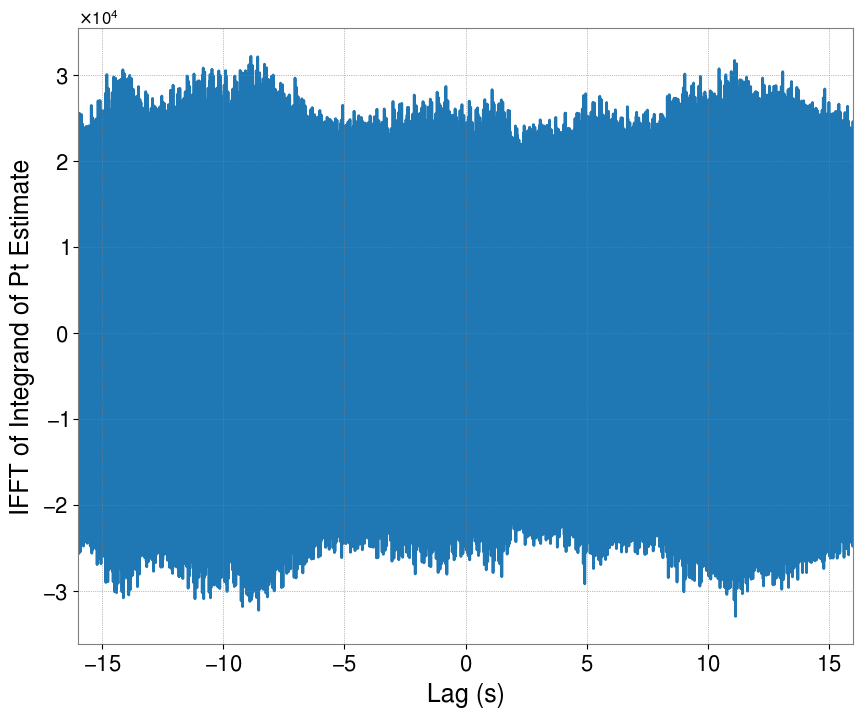

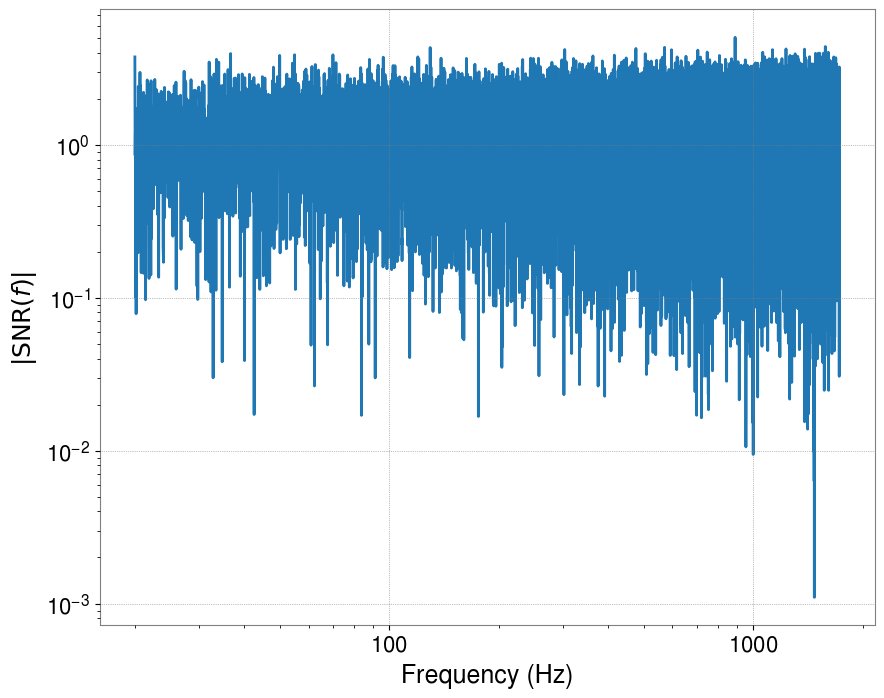

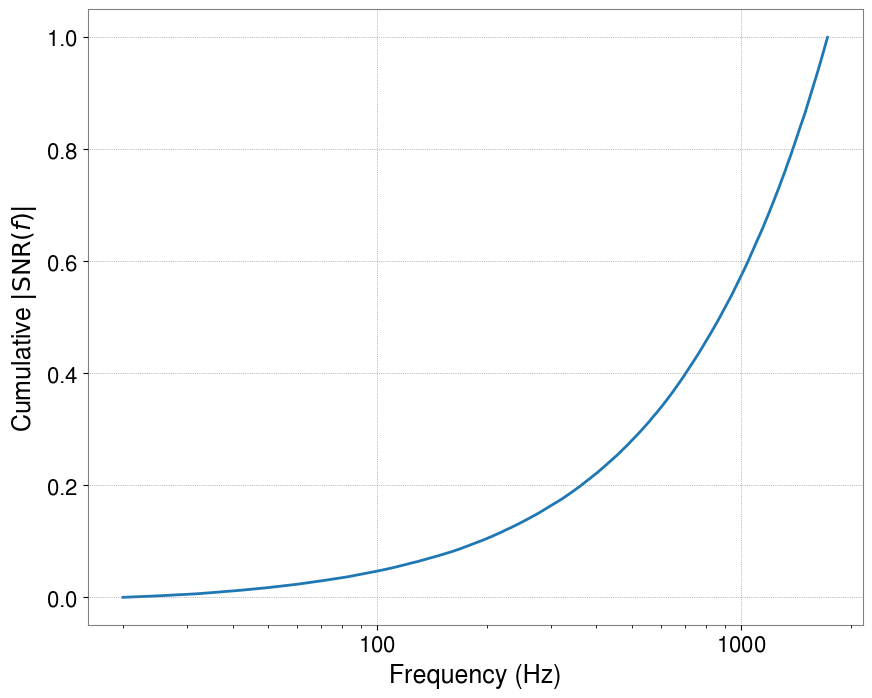

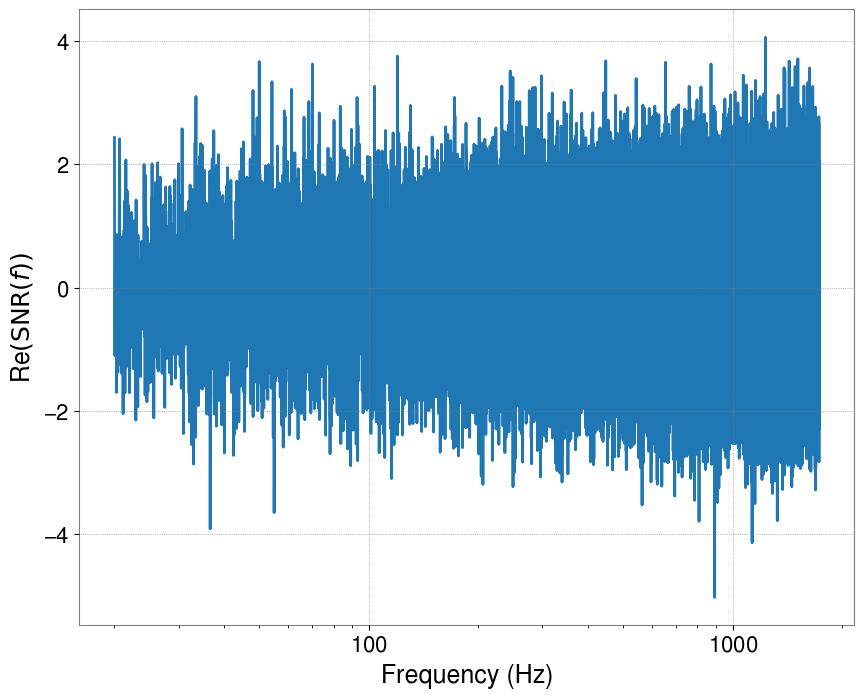

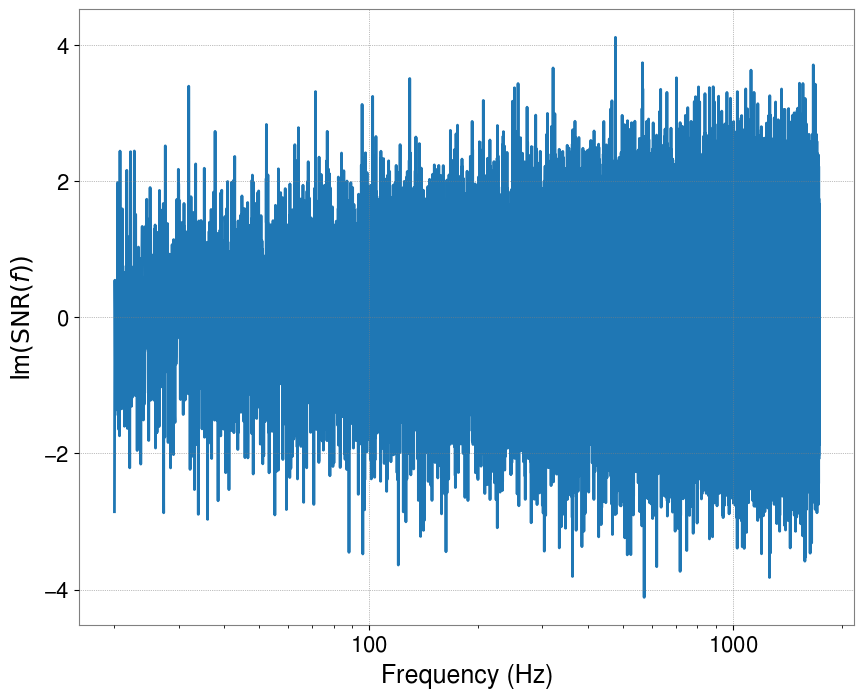

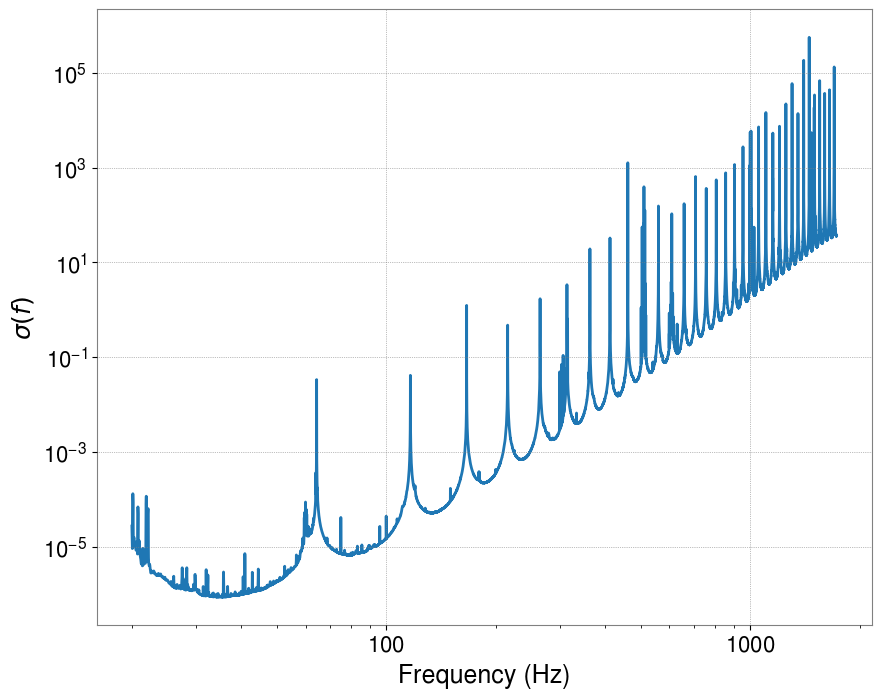

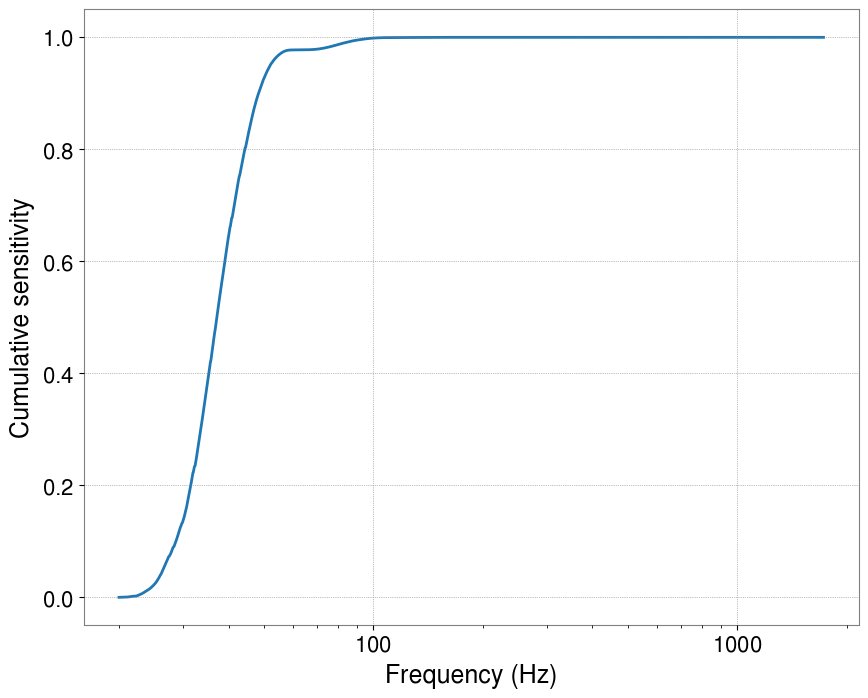

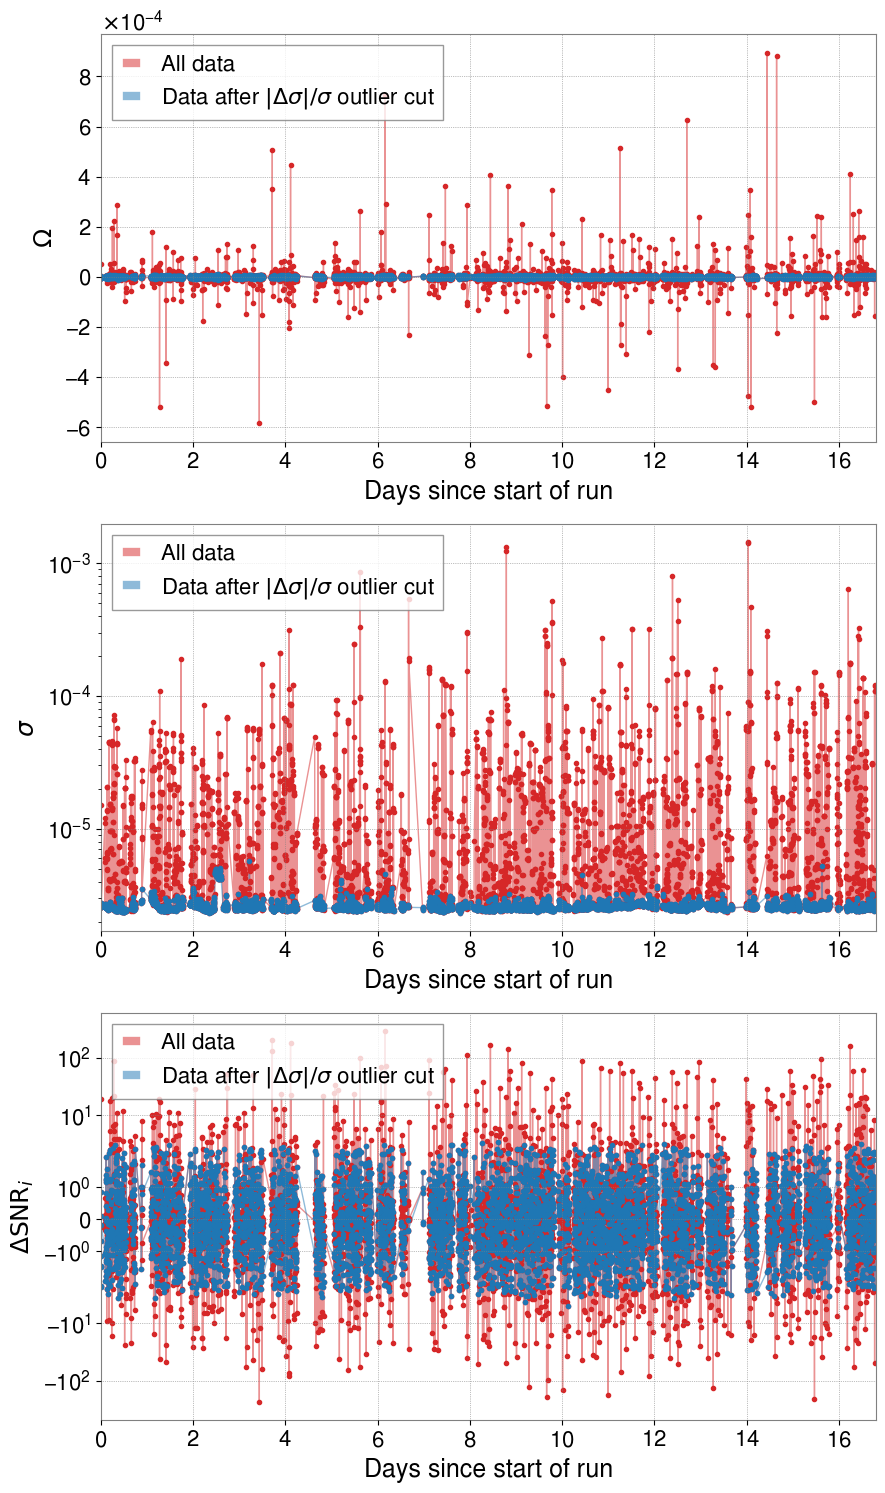

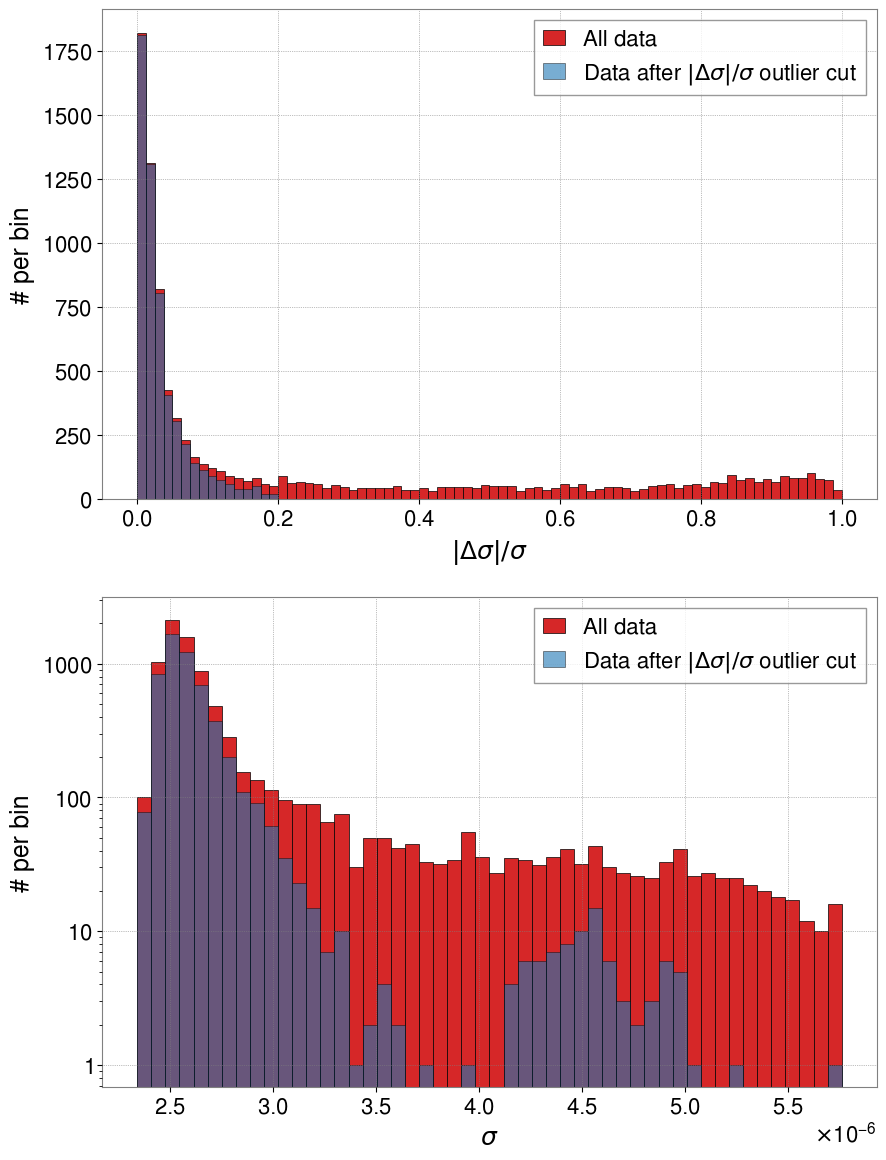

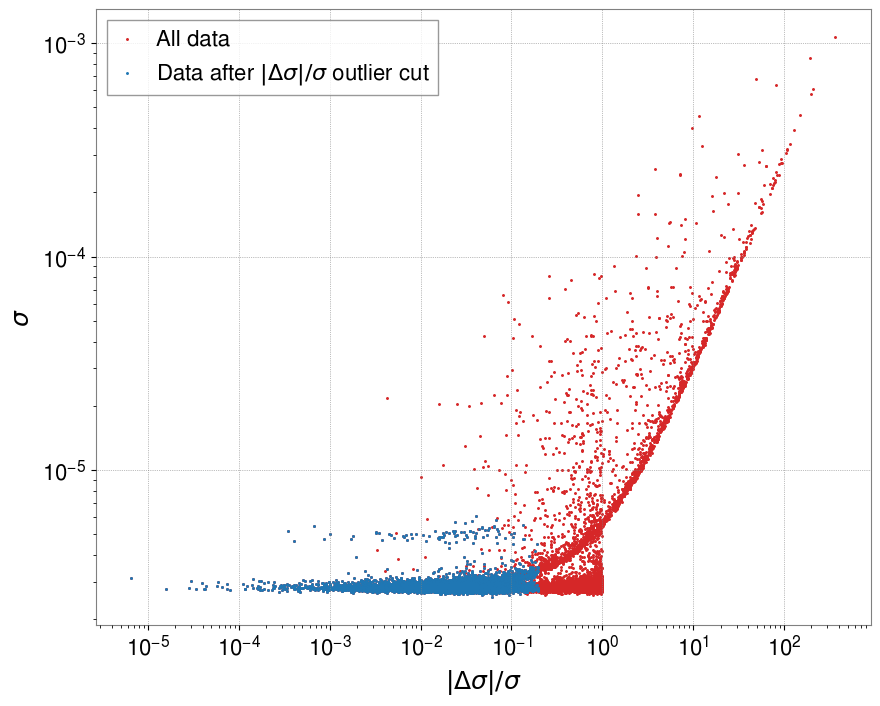

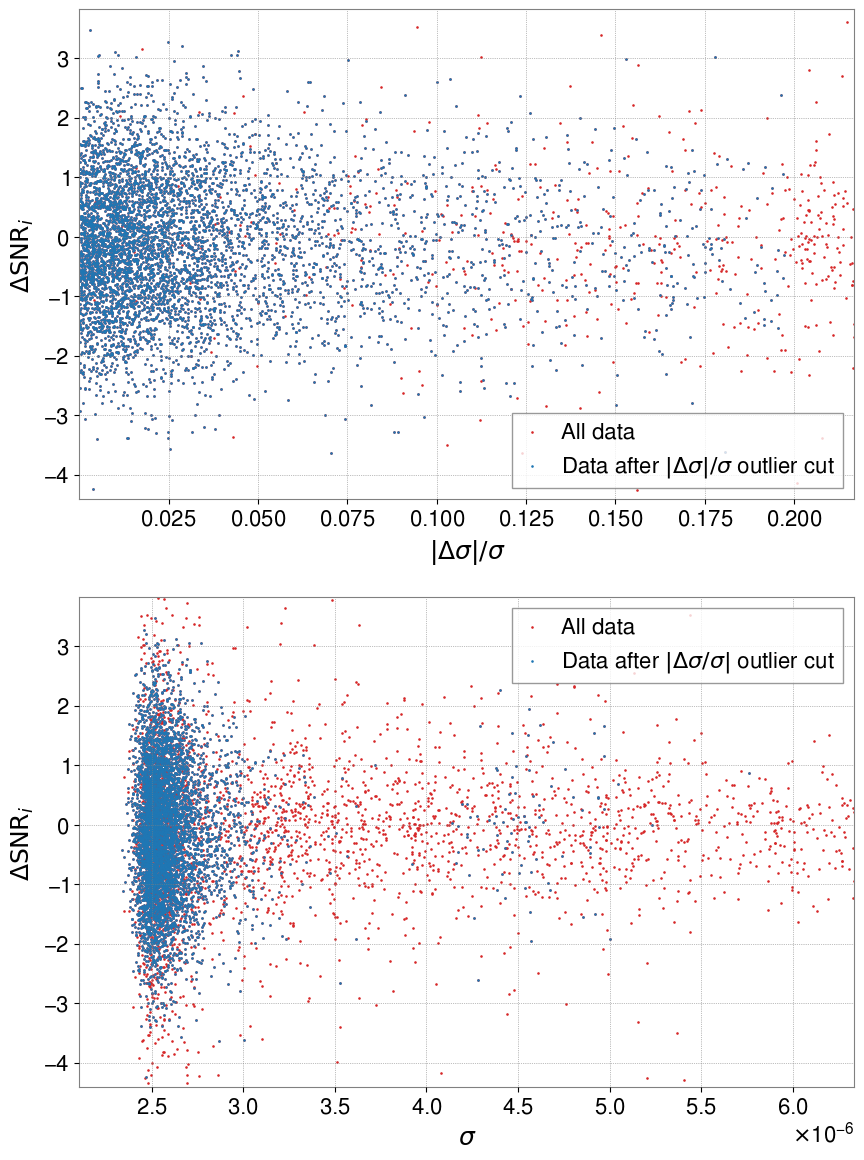

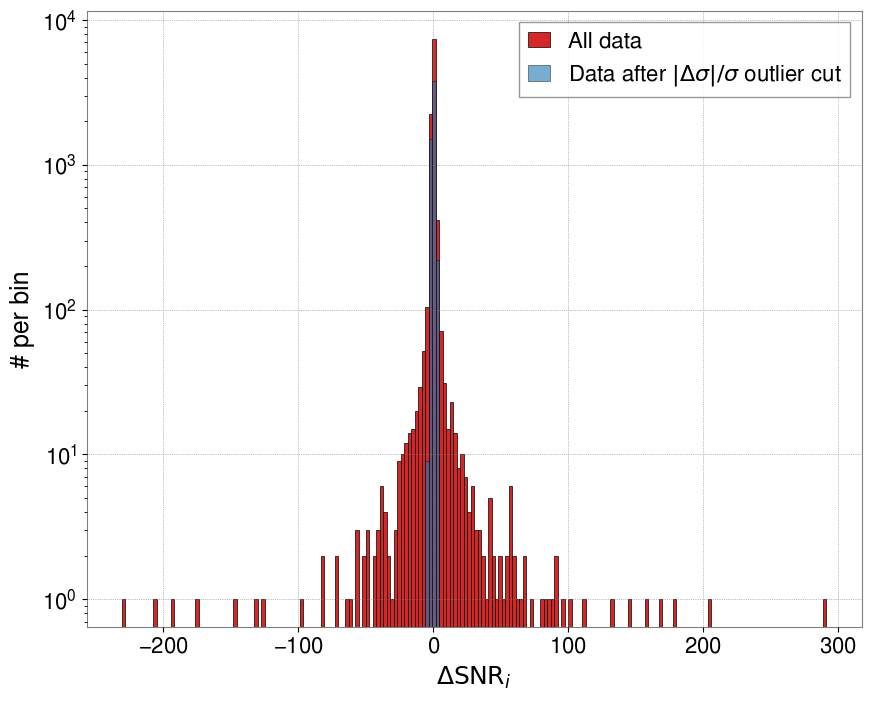

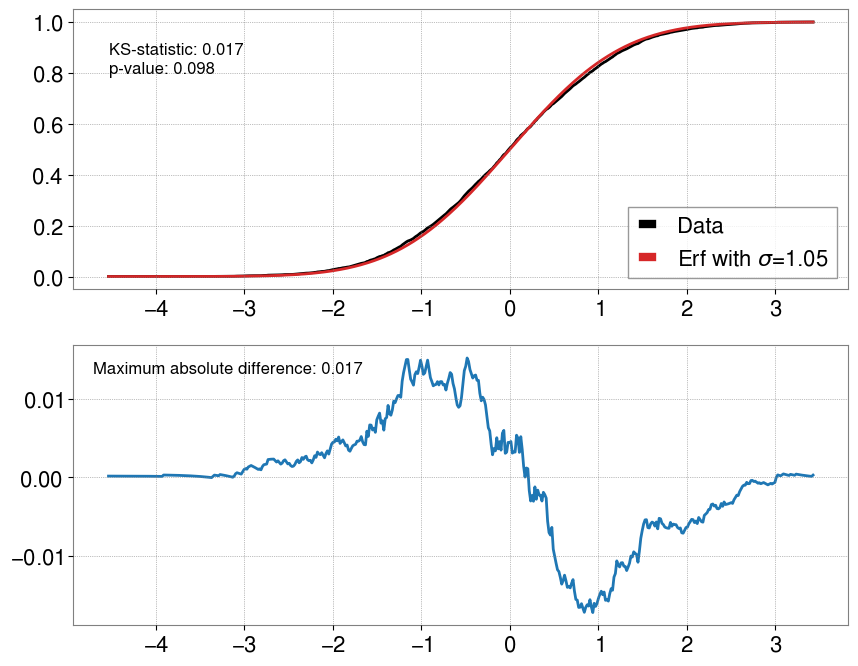

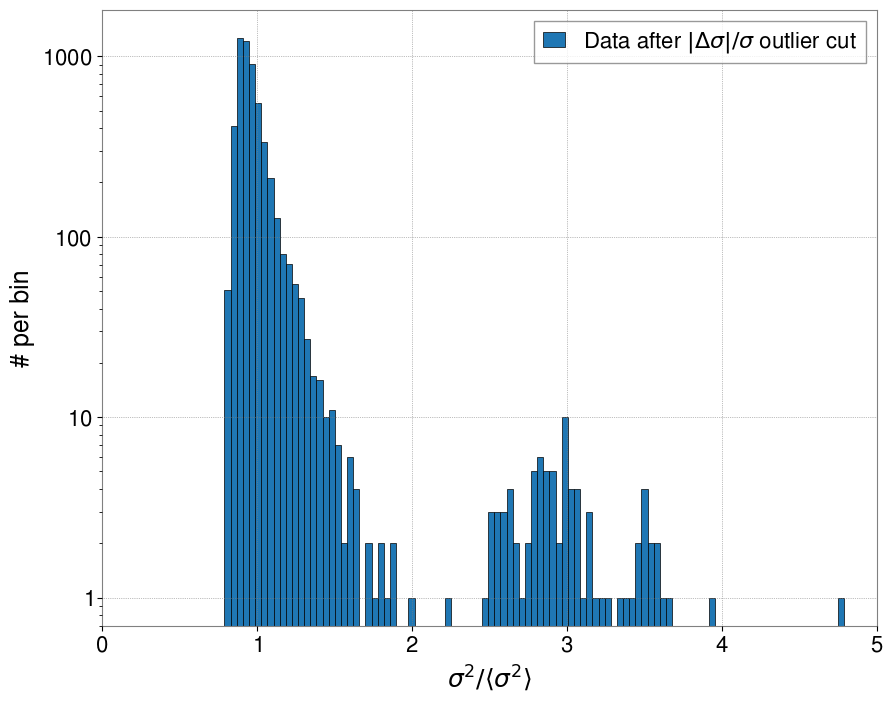

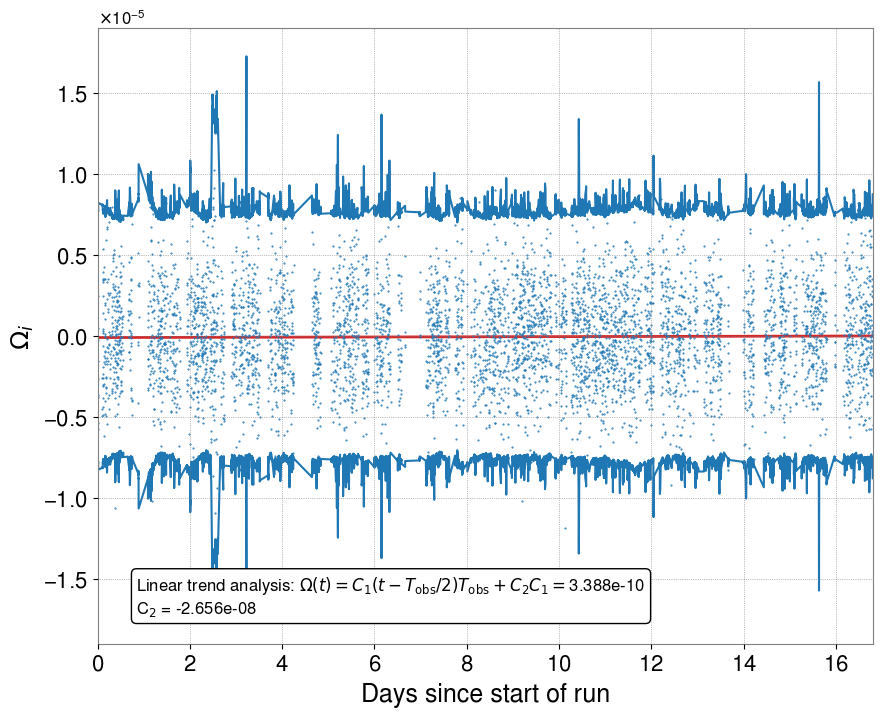

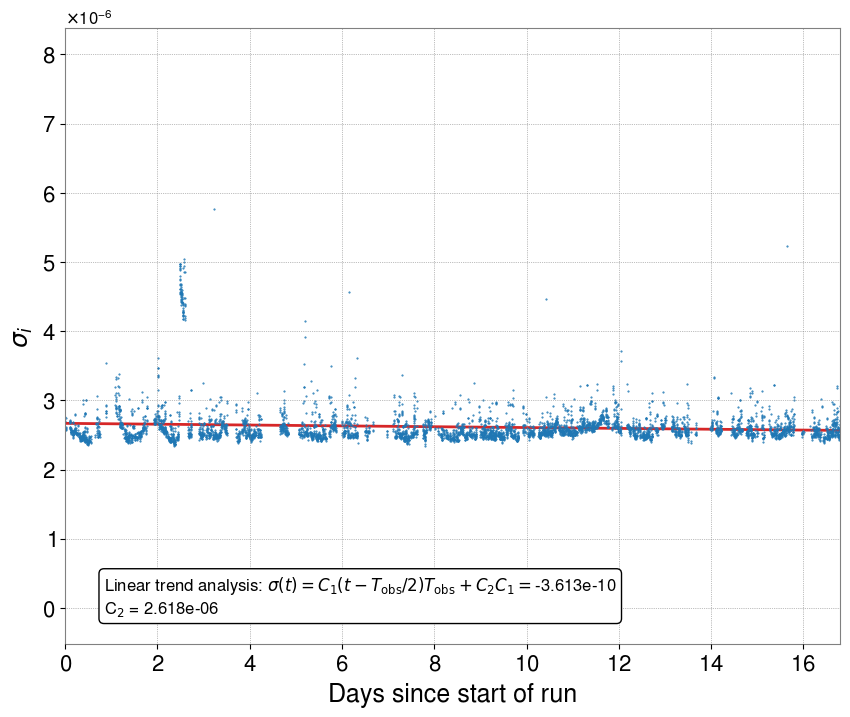

In [4]:
stat_checks_pygwb_O3.generate_all_plots()

We refrain from giving a plot per plot discussion of the `statistical checks` plots shown above, and refer to the [documentation](https://a-renzini.github.io/pygwb/api/pygwb.statistical_checks.html) of the `statistical checks`, as well as the `pygwb` [paper](https://arxiv.org/abs/2303.15696) for more information.